Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Step 1: Minibatch Loss: 0.429660
Step 1000: Minibatch Loss: 0.064297
Step 2000: Minibatch Loss: 0.059389
Step 3000: Minibatch Loss: 0.053141
Step 4000: Minibatch Loss: 0.048797
Step 5000: Minibatch Loss: 0.048813
Step 6000: Minibatch Loss: 0.046961
Step 7000: Minibatch Loss: 0.044992
Step 8000: Minibatch Loss: 0.041119
Step 9000: Minibatch Loss: 0.039332
Step 10000: Minibatch Loss: 0.039941
Step 11000: Minibatch Loss: 0.038118
Step 12000: Minibatch Loss: 0.038089
Step 13000: Minibatch Loss: 0.037908
Step 14000: Minibatch Loss: 0.038958
Step 15000: Minibatch Loss: 0.037358
Original Images


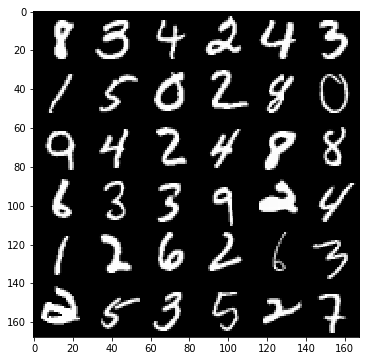

Reconstructed Images


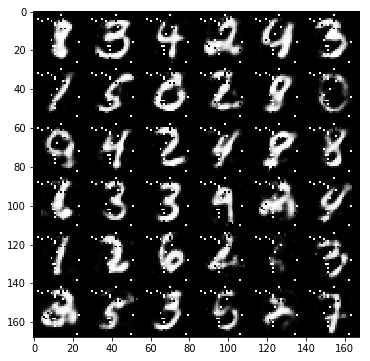

0.87529999999999997

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 29 17:24:48 2018

@author: dhritiman
"""

from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


# Training Parameters
learning_rate = 0.01
num_steps = 15000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 128 # 1st layer num features
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b1': tf.Variable(tf.random_normal([num_input])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    
    return layer_1


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    
    return layer_1

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
        

# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 6
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    e = sess.run(encoder_op, feed_dict={X: mnist.train.images})
    f = sess.run(encoder_op, feed_dict={X: mnist.test.images})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_labels = np.array([label.argmax() for label in mnist.train.labels])
test_labels = np.array([label.argmax() for label in mnist.test.labels])

model = LogisticRegression()
model.fit(e, train_labels)
predictions = model.predict(f)
accuracy_score(test_labels, predictions)

In [5]:
import K_means

In [6]:
K_means.kmeans_algo(mnist.train.images, train_labels, n_clusters = 10, metric = 'cosine')

0
Purity: 0.2959818181818182 Gini: 0.726410948618
1
Purity: 0.4269272727272727 Gini: 0.682966475127
2
Purity: 0.46696363636363636 Gini: 0.649544393906
3
Purity: 0.4853818181818182 Gini: 0.628289474716
4
Purity: 0.4999818181818182 Gini: 0.612700626962
5
Purity: 0.5119818181818182 Gini: 0.602424245712
6
Purity: 0.5206181818181819 Gini: 0.595422822221
7
Purity: 0.5272363636363636 Gini: 0.59049340786
8
Purity: 0.5315818181818182 Gini: 0.587145727735
9
Purity: 0.5340181818181818 Gini: 0.584394326997
10
Purity: 0.5348363636363637 Gini: 0.582243488968
11
Purity: 0.5346727272727273 Gini: 0.580376376994
12
Purity: 0.5346363636363637 Gini: 0.577892852085
13
Purity: 0.5348181818181819 Gini: 0.575164260176
14
Purity: 0.5354363636363636 Gini: 0.571967322385
15
Purity: 0.5347636363636363 Gini: 0.569165190082
16
Purity: 0.5336545454545455 Gini: 0.567001672759
17
Purity: 0.5335818181818182 Gini: 0.565699970748
18
Purity: 0.5344909090909091 Gini: 0.564514108439
19
Purity: 0.5352 Gini: 0.563765568876
20

In [7]:
K_means.kmeans_algo(mnist.test.images, test_labels, n_clusters = 10, metric = 'cosine')

0
Purity: 0.3589 Gini: 0.679690925788
1
Purity: 0.446 Gini: 0.615325232794
2
Purity: 0.4903 Gini: 0.583703806378
3
Purity: 0.5086 Gini: 0.569131776479
4
Purity: 0.5278 Gini: 0.554526160791
5
Purity: 0.5444 Gini: 0.537987232899
6
Purity: 0.5563 Gini: 0.523488806298
7
Purity: 0.5634 Gini: 0.509208689225
8
Purity: 0.5703 Gini: 0.496818983907
9
Purity: 0.5759 Gini: 0.492857273844
10
Purity: 0.5766 Gini: 0.494672152808
11
Purity: 0.5799 Gini: 0.492496700305
12
Purity: 0.5829 Gini: 0.492960454697
13
Purity: 0.5842 Gini: 0.493520832147
14
Purity: 0.5857 Gini: 0.493116605122
15
Purity: 0.5863 Gini: 0.493372039885
16
Purity: 0.5881 Gini: 0.492847931153
17
Purity: 0.5905 Gini: 0.490545358825
18
Purity: 0.5947 Gini: 0.487974972058
19
Purity: 0.5975 Gini: 0.484292356146
20
Purity: 0.6001 Gini: 0.480471263339
21
Purity: 0.6035 Gini: 0.475817375606
22
Purity: 0.6054 Gini: 0.470018843701
23
Purity: 0.6053 Gini: 0.465669688697
24
Purity: 0.6051 Gini: 0.462123726764
25
Purity: 0.6036 Gini: 0.4625213636

In [8]:
K_means.kmeans_algo(e, train_labels, n_clusters = 10, metric = 'cosine')

0
Purity: 0.3851818181818182 Gini: 0.742146700117
1
Purity: 0.4449090909090909 Gini: 0.66832190418
2
Purity: 0.4829090909090909 Gini: 0.629149536779
3
Purity: 0.5102545454545454 Gini: 0.602190701942
4
Purity: 0.5283636363636364 Gini: 0.584108498183
5
Purity: 0.5410363636363636 Gini: 0.571946799753
6
Purity: 0.55 Gini: 0.564402796316
7
Purity: 0.5598363636363637 Gini: 0.556800683401
8
Purity: 0.569 Gini: 0.548094820074
9
Purity: 0.5781090909090909 Gini: 0.535831898581
10
Purity: 0.584690909090909 Gini: 0.524670857985
11
Purity: 0.5889818181818182 Gini: 0.514989795286
12
Purity: 0.5931454545454545 Gini: 0.506582845996
13
Purity: 0.5974545454545455 Gini: 0.49912052108
14
Purity: 0.6013090909090909 Gini: 0.494364843623
15
Purity: 0.6037454545454546 Gini: 0.491766764447
16
Purity: 0.6050909090909091 Gini: 0.491209160611
17
Purity: 0.6050727272727273 Gini: 0.49167023895
18
Purity: 0.6035636363636364 Gini: 0.493973095635
19
Purity: 0.6013818181818181 Gini: 0.497153193922
20
Purity: 0.59927272

In [9]:
K_means.kmeans_algo(f, test_labels, n_clusters = 10, metric = 'cosine')

0
Purity: 0.3373 Gini: 0.757644549219
1
Purity: 0.3774 Gini: 0.728338088662
2
Purity: 0.4178 Gini: 0.709922163317
3
Purity: 0.4611 Gini: 0.683031013631
4
Purity: 0.4973 Gini: 0.653593333087
5
Purity: 0.5243 Gini: 0.615473391976
6
Purity: 0.5466 Gini: 0.570582701822
7
Purity: 0.5566 Gini: 0.543514232722
8
Purity: 0.5578 Gini: 0.532912329603
9
Purity: 0.5596 Gini: 0.528358879694
10
Purity: 0.5596 Gini: 0.526389396536
11
Purity: 0.5589 Gini: 0.523837362092
12
Purity: 0.5588 Gini: 0.521792395693
13
Purity: 0.557 Gini: 0.521559022945
14
Purity: 0.5572 Gini: 0.520449395308
15
Purity: 0.5571 Gini: 0.519738925462
16
Purity: 0.5568 Gini: 0.519023430762
17
Purity: 0.5572 Gini: 0.517616782801
18
Purity: 0.5618 Gini: 0.516296723661
19
Purity: 0.5661 Gini: 0.51553396835
20
Purity: 0.5706 Gini: 0.513644941372
21
Purity: 0.5747 Gini: 0.511930850958
22
Purity: 0.5775 Gini: 0.510564778212
23
Purity: 0.5803 Gini: 0.509225125397
24
Purity: 0.582 Gini: 0.509120988328
25
Purity: 0.5842 Gini: 0.508562291128